# TP2 Machine Learning - Part 1: Feature engineering & Classification 

*William BLAUFUKS* & *Virgile FOY*  

In [1]:
import numpy as np 
#np.set_printoptions(threshold=np.nan, suppress=True) 
import pandas as pd
import warnings
import matplotlib.pyplot as plt 
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, cross_val_score, KFold
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline, FeatureUnion
import seaborn as sns
import pickle

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier

## 1. Data loading & preprocessing

In [2]:
# data loading
df_csv = pd.read_csv('credit_scoring.csv', sep=';')

In [3]:
df_csv.head()

,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price,Status
0,9.0,1.0,60.0,30.0,0.0,1.0,1.0,73.0,129.0,0.0,0.0,800.0,846.0,1
1,17.0,1.0,60.0,58.0,1.0,1.0,0.0,48.0,131.0,0.0,0.0,1000.0,1658.0,1
2,10.0,0.0,36.0,46.0,0.0,2.0,1.0,90.0,200.0,3000.0,0.0,2000.0,2985.0,0
3,0.0,1.0,60.0,24.0,1.0,1.0,0.0,63.0,182.0,2500.0,0.0,900.0,1325.0,1
4,0.0,1.0,36.0,26.0,1.0,1.0,0.0,46.0,107.0,0.0,0.0,310.0,910.0,1


In [4]:
# Seniority, Time, Age, 

df = df_csv.copy()

# shape and summary
print(df.shape)
print(df.describe())

(4375, 14)
         Seniority         Home         Time          Age      Marital  \
count  4375.000000  4375.000000  4375.000000  4375.000000  4375.000000   
mean      7.985143     0.528229    46.518857    37.021714     0.271086   
std       8.173922     0.499260    14.619282    10.973187     0.444571   
min       0.000000     0.000000     6.000000    18.000000     0.000000   
25%       2.000000     0.000000    36.000000    28.000000     0.000000   
50%       5.000000     1.000000    48.000000    36.000000     0.000000   
75%      12.000000     1.000000    60.000000    45.000000     1.000000   
max      48.000000     1.000000    72.000000    68.000000     1.000000   

           Records          Job     Expenses       Income         Assets  \
count  4375.000000  4375.000000  4375.000000  4375.000000    4375.000000   
mean      1.172114     0.364114    55.595200   130.848914    5298.431314   
std       0.377523     0.481236    19.451569    86.199518   10582.377366   
min       1.000000

Text(0.5, 0, 'Status')

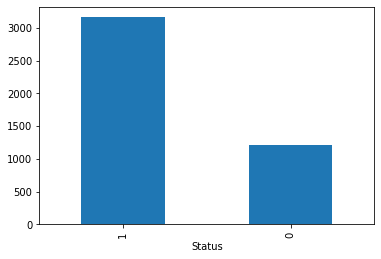

In [5]:
df = df_csv.copy()

# distribution of dependent variable
df['Status'].value_counts().plot(kind='bar')
plt.xlabel('Status')

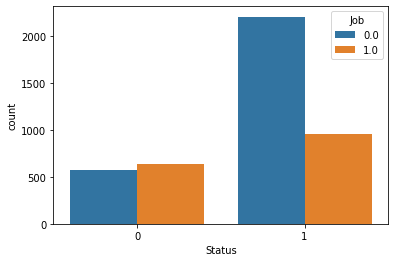

In [6]:
df = df_csv.copy()

ax = sns.countplot(x="Status", hue="Job", data=df)

Note that people without a full-time contract pay their loan back more often.

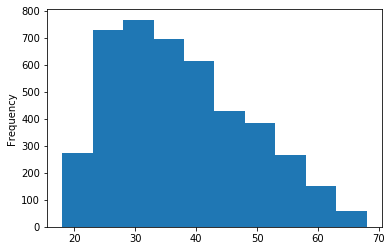

In [7]:
df = df_csv.copy()

# Distribution of ages
df['Age'].plot.hist()

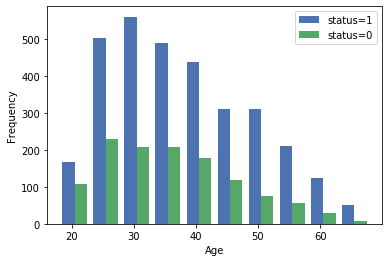

In [8]:
df = df_csv.copy()

# Distribution of 'Status' in function of 'Age'
plt.style.use('seaborn-deep')
plt.hist([df[df['Status'] == 1]['Age'], df[df['Status'] == 0]['Age']], label=['status=1', 'status=0'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()

In [9]:
df = df_csv.copy()

# To np array
df = df.to_numpy()
X = df[:, :-1]
y = df[:, -1]

# Test
print(X.shape)
print(y.shape)

(4375, 13)
(4375,)


In [10]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

# Test
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2187, 13)
(2188, 13)
(2187,)
(2188,)


In [11]:
def preprocessing(test_size=.5):
    
    df_csv = pd.read_csv('credit_scoring.csv', sep=';')
    df = df_csv.to_numpy()
    X = df[:, :-1]
    y = df[:, -1]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1)
    
    return X_train, X_test, y_train, y_test

## 2. Training & Model evaluation

In [13]:
# Baseline model

def eval_baseline(X_train, X_test, y_train, y_test):
    
    np.random.seed(1)
    trigger = y_train.mean()

    y_pred = np.random.uniform(size=y_test.shape) > trigger
    y_true = y_test
    
    acc = accuracy_score(y_true, y_pred)
    
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    
    # Precision is more important because we don't want to "shoot too large", we don't want many FALSE POSITIVES.
    precision = tp / (tp + fp)
    
    return acc, precision

# Tests
X_train, X_test, y_train, y_test = preprocessing()
acc, precision = eval_baseline(X_train, X_test, y_train, y_test)
print('Baseline model')
print('====================')
print('Accuracy: {}'.format(acc))
print('Precision: {}'.format(precision))
print('')


Baseline model
Accuracy: 0.4040219378427788
Precision: 0.7243589743589743



In [14]:
# K-NN

def eval_knn(X_train, X_test, y_train, y_test, n_neighbors=5):
    
    neigh = KNeighborsClassifier(n_neighbors=n_neighbors)
    neigh.fit(X_train, y_train)

    acc = neigh.score(X_test, y_test)

    y_true, y_pred = y_test, neigh.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    # Precision is more important because we don't want to "shoot too large", we don't want many FALSE POSITIVES.
    precision = tp / (tp + fp)
    
    return acc, precision

# Tests
X_train, X_test, y_train, y_test = preprocessing()
acc, precision = eval_knn(X_train, X_test, y_train, y_test)
print('K-nn (5 neighbors)')
print('====================')
print('Accuracy: {}'.format(acc))
print('Precision: {}'.format(precision))
print('')

K-nn (5 neighbors)
Accuracy: 0.7248628884826326
Precision: 0.7709713024282561



The K-nn model (with 5 neighbors) has both a better accuracy and a better precision than the baseline model.

In [15]:
# CART

def eval_cart(X_train, X_test, y_train, y_test):
    
    cart = DecisionTreeClassifier(random_state=1)
    cart.fit(X_train, y_train)
    
    acc = cart.score(X_test, y_test)
    
    y_true, y_pred = y_test, cart.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    
    # Precision is more important because we don't want to "shoot too large", we don't want many FALSE POSITIVES.
    precision = tp / (tp + fp)
    
    return acc, precision

# Tests
X_train, X_test, y_train, y_test = preprocessing()
acc, precision = eval_cart(X_train, X_test, y_train, y_test)
print('CART')
print('====================')
print('Accuracy: {}'.format(acc))
print('Precision: {}'.format(precision))
print('')

CART
Accuracy: 0.7271480804387569
Precision: 0.8194174757281554



CART model has both a better accuracy and a better precision than the KNN model.

## 3. Continuous variables scaling



In [16]:
# Scaling
def scale(X_train, X_test, scaler=None):

    if scaler == 'StandardScaler':
        scaler = StandardScaler()
        scaler.fit(X_train)
        
    elif scaler == 'MinMaxScaler':
        scaler = MinMaxScaler()
        scaler.fit(X_train)

    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    return X_train, X_test

# Tests
X_train, X_test, y_train, y_test = preprocessing()

# k-nn without scaler (same than above)
acc, precision = eval_knn(X_train, X_test, y_train, y_test)
print('k-nn without scaling')
print('====================')
print('Accuracy: {}'.format(acc))
print('Precision: {}'.format(precision))
print('')

# k-nn with standard scaler
X_train, X_test = scale(X_train, X_test, scaler='StandardScaler')
acc, precision = eval_knn(X_train, X_test, y_train, y_test)
print('k-nn with standard scaling')
print('====================')
print('Accuracy: {}'.format(acc))
print('Precision: {}'.format(precision))
print('')

# k-nn with min-max scaler
X_train, X_test = scale(X_train, X_test, scaler='MinMaxScaler')
acc, precision = eval_knn(X_train, X_test, y_train, y_test)
print('k-nn with min-max scaling')
print('====================')
print('Accuracy: {}'.format(acc))
print('Precision: {}'.format(precision))
print('')

# CART without scaler (same than above)
acc, precision = eval_cart(X_train, X_test, y_train, y_test)
print('CART without scaling')
print('====================')
print('Accuracy: {}'.format(acc))
print('Precision: {}'.format(precision))
print('')

# CART with standard scaler
X_train, X_test = scale(X_train, X_test, scaler='StandardScaler')
acc, precision = eval_cart(X_train, X_test, y_train, y_test)
print('CART with standard scaling')
print('====================')
print('Accuracy: {}'.format(acc))
print('Precision: {}'.format(precision))
print('')

# CART with min-max scaler
X_train, X_test = scale(X_train, X_test, scaler='MinMaxScaler')
acc, precision = eval_cart(X_train, X_test, y_train, y_test)
print('CART with min-max scaling')
print('====================')
print('Accuracy: {}'.format(acc))
print('Precision: {}'.format(precision))
print('')

k-nn without scaling
Accuracy: 0.7248628884826326
Precision: 0.7709713024282561

k-nn with standard scaling
Accuracy: 0.7527422303473492
Precision: 0.8106015485407981

k-nn with min-max scaling
Accuracy: 0.7454296160877514
Precision: 0.8076692630317556

CART without scaling
Accuracy: 0.7285191956124314
Precision: 0.8197674418604651

CART with standard scaling
Accuracy: 0.7271480804387569
Precision: 0.8181818181818182

CART with min-max scaling
Accuracy: 0.7285191956124314
Precision: 0.8197674418604651



It turns out the best accuracy is obtained with the KNN model after standard scaling.
But as the best precision is obtained with the __CART model after min-max scaling__, we'll select the latter.

## 4. Creation of new variables

In [18]:
# PCA
def add_pca_columns(X, X_train, n_components=3):
    
    pca = PCA(n_components=n_components).fit(X_train)
    
    X_pca = pca.transform(X)
    
    X_new = np.concatenate([X, X_pca], axis=1)
    
    return X_new

# Tests
X_train, X_test, y_train, y_test = preprocessing()
X_train, X_test = scale(X_train, X_test, scaler='StandardScaler')
X_train_pca = add_pca_columns(X_train, X_train)
X_test_pca = add_pca_columns(X_test, X_train)

acc, precision = eval_knn(X_train_pca, X_test_pca, y_train, y_test)
print('k-nn (5 neighbors) with standard scaling and PCA columns')
print('====================')
print('Accuracy: {}'.format(acc))
print('Precision: {}'.format(precision))
print('')

acc, precision = eval_cart(X_train_pca, X_test_pca, y_train, y_test)
print('CART with standard scaling and PCA columns')
print('====================')
print('Accuracy: {}'.format(acc))
print('Precision: {}'.format(precision))
print('')

k-nn (5 neighbors) with standard scaling and PCA columns
Accuracy: 0.756398537477148
Precision: 0.8103957471943296

CART with standard scaling and PCA columns
Accuracy: 0.7362888482632541
Precision: 0.8327825512227363



## 5. Variable selection

['Income' 'Seniority' 'Price' 'Amount' 'Age' 'Assets' 'Expenses' 'Records'
 'Time' 'Job' 'Debt' 'Home' 'Marital']


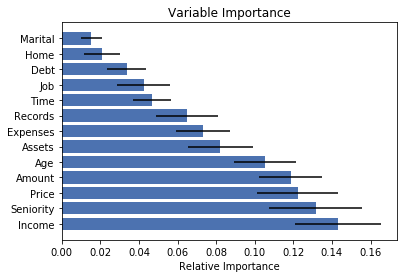

In [19]:
X_train, X_test, y_train, y_test = preprocessing()
Xtrain_scale, Xtest_scale = scale(X_train, X_test, scaler='StandardScaler')

clf = RandomForestClassifier(n_estimators=100) 
clf.fit(Xtrain_scale, y_train) 
importances=clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],axis=0) 

sorted_idx = np.argsort(importances)[::-1]

col_names = pd.read_csv('credit_scoring.csv', sep=';').columns.values
features = col_names
print(features[sorted_idx])
padding = np.arange(Xtrain_scale.size/len(Xtrain_scale)) + 0.5 
plt.barh(padding, importances[sorted_idx],xerr=std[sorted_idx], align='center') 
plt.yticks(padding, features[sorted_idx])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
plt.show()

Note that Income, Seniority, Price and Amount are the most significant variables in this dataset.

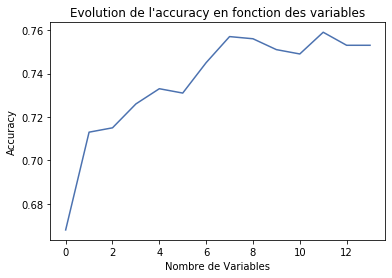

In [20]:
X_train, X_test, y_train, y_test = preprocessing()
Xtrain_scale, Xtest_scale = scale(X_train, X_test, scaler='StandardScaler')

KNN = KNeighborsClassifier(n_neighbors=5) 
scores = np.zeros(Xtrain_scale.shape[1]+1)
for f in np.arange(0, Xtrain_scale.shape[1]+1):
    X1_f = Xtrain_scale[:, sorted_idx[:f+1]]
    X2_f = Xtest_scale[:, sorted_idx[:f+1]]
    KNN.fit(X1_f, y_train)
    YKNN=KNN.predict(X2_f) 
    scores[f]=np.round(accuracy_score(y_test, YKNN), 3)

plt.plot(scores)
plt.xlabel("Nombre de Variables")
plt.ylabel("Accuracy")
plt.title("Evolution de l'accuracy en fonction des variables") 
plt.show()

Note that the optimal accuracy is obtained with __7 variables__.

## 6. Classifier's parameters tuning

In [21]:
knn_model = KNeighborsClassifier(n_neighbors=5) 

parameters = {
    'n_neighbors': np.arange(1, 30, 1)
}

clf = GridSearchCV(knn_model, parameters, scoring='precision')

# Tests
X_train, X_test, y_train, y_test = preprocessing()
X_train, X_test = scale(X_train, X_test, scaler='StandardScaler')
X_train_pca = add_pca_columns(X_train, X_train)
X_test_pca = add_pca_columns(X_test, X_train)

clf.fit(X_train_pca, y_train)
clf.best_estimator_.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 2,
 'p': 2,
 'weights': 'uniform'}

In [22]:
cart_model = DecisionTreeClassifier(random_state=1) 

parameters = {
    'criterion': ["gini", "entropy"],
    'splitter': ["best", "random"],
    'max_depth': np.concatenate((np.arange(1,5), 5*np.arange(1,21)))
}

clf = GridSearchCV(cart_model, parameters, scoring='precision')

# Tests
X_train, X_test, y_train, y_test = preprocessing()
X_train, X_test = scale(X_train, X_test, scaler='StandardScaler')
X_train_pca = add_pca_columns(X_train, X_train)
X_test_pca = add_pca_columns(X_test, X_train)

clf.fit(X_train_pca, y_train)
clf.best_estimator_.get_params()

{'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': 1,
 'splitter': 'random'}

## 7. Pipeline creation

### 7.1. Pipeline with K-nn

In [23]:
# Define the operators
scaler = StandardScaler() # scale data for PCA
new_pca_columns = FeatureUnion([
    ("pca", PCA()), 
    ("dummy_scaler", StandardScaler())]) # add PCA columns to the dataset as new features  
select_var = SelectKBest(f_classif, k=10) # select the 10 best features based on f_classif criteria
knn_model = KNeighborsClassifier(n_neighbors=5) # classifier

# Define a pipeline to search for the best combination
knn_pipeline = Pipeline([
    ('scaler', scaler),
    ('new_pca_columns', new_pca_columns),
    ('selecVar', select_var),
    ('knn_model', knn_model) 
])

# Load data
X_train, X_test, y_train, y_test = preprocessing()

# Gridsearch the pipeline
param_grid = {
    'new_pca_columns__pca__n_components': np.arange(1, 9),
    'knn_model__n_neighbors': np.arange(1, 30)
}

search = GridSearchCV(knn_pipeline, param_grid, scoring='precision', iid=False, cv=5)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

# Save pipeline in a pickle
pickle.dump(knn_pipeline, open('knn_pipeline.pkl', 'wb'))

Best parameter (CV score=0.847):
{'knn_model__n_neighbors': 2, 'new_pca_columns__pca__n_components': 2}


In [24]:
# Load the pipeline parameters from the .pkl file
file_name = 'knn_pipeline.pkl'
pipeline = pickle.load(open(file_name, 'rb'))

# Apply the best pipeline to the test dataset
best_pipeline = search.best_estimator_
y_pred = best_pipeline.predict(X_test)
y_true = y_test

# Calculate accuracy and precision
acc = accuracy_score(y_true, y_pred)
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
precision = tp / (tp + fp)

# Print results
print('Accuracy score: {}'.format(acc))
print('Precision score: {}'.format(precision))
print('Obtained with {} neighbors in the knn and {} principal components added'.format(
    search.best_params_['knn_model__n_neighbors'],
    search.best_params_['new_pca_columns__pca__n_components']
))

Accuracy score: 0.6750457038391224
Precision score: 0.8586688578471652
Obtained with 2 neighbors in the knn and 2 principal components added


### 7.2. Pipeline with CART 

In [25]:
# Define the operators
scaler = StandardScaler() # scale data for PCA
new_pca_columns = FeatureUnion([
    ("pca", PCA()), 
    ("dummy_scaler", StandardScaler())]) # add PCA columns to the dataset as new features  
select_var = SelectKBest(f_classif, k=10) # select the 10 best features based on f_classif criteria
cart_model = DecisionTreeClassifier(random_state=1) # classifier

# Define a pipeline to search for the best combination
cart_pipeline = Pipeline([
    ('scaler', scaler),
    ('new_pca_columns', new_pca_columns),
    ('selecVar', select_var),
    ('cart_model', cart_model) 
])

# Load data
X_train, X_test, y_train, y_test = preprocessing()

# Gridsearch the pipeline
param_grid = {
    'new_pca_columns__pca__n_components': np.arange(1, 9),
    'cart_model__criterion': ["gini", "entropy"],
    'cart_model__splitter': ["best", "random"],
    'cart_model__max_depth': np.concatenate((np.arange(1, 5), 5*np.arange(1, 21)))
}

search = GridSearchCV(cart_pipeline, param_grid, scoring='precision', iid=False, cv=5)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

# Save pipeline in a pickle
pickle.dump(cart_pipeline, open('cart_pipeline.pkl', 'wb'))

Best parameter (CV score=0.827):
{'cart_model__criterion': 'gini', 'cart_model__max_depth': 4, 'cart_model__splitter': 'random', 'new_pca_columns__pca__n_components': 2}


In [26]:
# Load the pipeline parameters from the .pkl file
file_name = 'cart_pipeline.pkl'
pipeline = pickle.load(open(file_name, 'rb'))

# Apply the best pipeline to the test dataset
best_pipeline = search.best_estimator_
y_pred = best_pipeline.predict(X_test)
y_true = y_test

# Calculate accuracy and precision
acc = accuracy_score(y_true, y_pred)
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
precision = tp / (tp + fp)

# Print results
print('Accuracy score: {}'.format(acc))
print('Precision score: {}'.format(precision))
print('Obtained with {} criterion, {} splitter and max_depth = {} in the CART model and {} principal components added'.format(
    search.best_params_['cart_model__criterion'],
    search.best_params_['cart_model__splitter'],
    search.best_params_['cart_model__max_depth'],
    search.best_params_['new_pca_columns__pca__n_components']
))

Accuracy score: 0.7426873857404022
Precision score: 0.8220820189274448
Obtained with gini criterion, random splitter and max_depth = 4 in the CART model and 2 principal components added


The best pipeline with CART has a precision of 82.2% whereas the one with knn has a precision of 86%. We'll keep the knn model with 2 neighbors in the knn and 2 principal components added.

## 8. Comparing several algorithms

In [27]:
clfs = {
    'KNN':KNeighborsClassifier(n_neighbors=10),
    'NBS': GaussianNB(),
    'CART': DecisionTreeClassifier(criterion = 'gini'),
    'ID3': DecisionTreeClassifier(criterion = 'entropy'),
    'MLP10': MLPClassifier(hidden_layer_sizes=(10,)),
    'MLP20': MLPClassifier(hidden_layer_sizes=(20,)),
    'kNN5' : KNeighborsClassifier(n_neighbors=5),
    'Bagg50': BaggingClassifier(n_estimators = 50),
    'AdaBoost' : AdaBoostClassifier(n_estimators = 50),
    'RF':RandomForestClassifier(n_estimators=50,random_state=1),
}

In [28]:
X_train, X_test, y_train, y_test = preprocessing(test_size=.1)
X_train, X_test = scale(X_train, X_test, scaler='StandardScaler')
X_train_pca = add_pca_columns(X_train, X_train)
X_test_pca = add_pca_columns(X_test, X_train)

kf = KFold(n_splits=10, shuffle=True, random_state=0) 

for key in clfs:
    
    clf = clfs[key]
    cv_precision = cross_val_score(clf, X_train, y_train, cv=kf, scoring='precision')
    print("Precision for {0} is: {1:.3f} +/- {2:.3f}".format(key, np.mean(cv_precision), np.std(cv_precision)))


Precision for KNN is: 0.816 +/- 0.021
Precision for NBS is: 0.841 +/- 0.019
Precision for CART is: 0.810 +/- 0.016
Precision for ID3 is: 0.808 +/- 0.018
Precision for MLP10 is: 0.827 +/- 0.018
Precision for MLP20 is: 0.831 +/- 0.017
Precision for kNN5 is: 0.813 +/- 0.021
Precision for Bagg50 is: 0.828 +/- 0.016
Precision for AdaBoost is: 0.824 +/- 0.016
Precision for RF is: 0.820 +/- 0.015


It turns out the best presicion is obtained with the NBS classifier.